In [1]:
import tensorflow
tensorflow.__version__

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'1.4.0'

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [29]:
def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap='gnuplot2')
        plt.axis('off')
        plt.subplots_adjust(wspace=0.8, hspace=0.01)
        
    if imfile:
        plt.savefig(imfile)

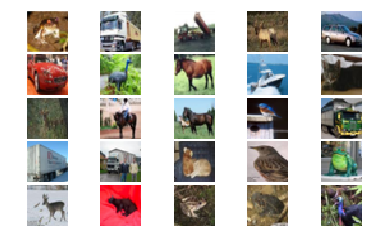

In [30]:
draw_sample(X_train, y_train, 0, 5, 5)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train = y_train.reshape(y_train.shape[0])  #y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

In [8]:
y_train.shape

(50000,)

In [9]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
# Size of the batch
batch_size = 32
# Number of classes of images
nb_classes = 10
# Number of epochs for learning
num_epochs = 100
# Size of the images
img_rows, img_cols = 32, 32
# Number of channels in the image: RGB
img_channels = 3

In [11]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
# Convert the labels to categories
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train.shape

(50000, 10)

In [14]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))


In [15]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
%%time
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_split=0.1,
          shuffle=True,
          verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 21s - loss: 2.0591 - acc: 0.2377 - val_loss: 1.7816 - val_acc: 0.3744
Epoch 2/100
 - 20s - loss: 1.7066 - acc: 0.3778 - val_loss: 1.5423 - val_acc: 0.4460
Epoch 3/100
 - 20s - loss: 1.5390 - acc: 0.4417 - val_loss: 1.4081 - val_acc: 0.4968
Epoch 4/100
 - 20s - loss: 1.4200 - acc: 0.4855 - val_loss: 1.3021 - val_acc: 0.5338
Epoch 5/100
 - 20s - loss: 1.3331 - acc: 0.5195 - val_loss: 1.2271 - val_acc: 0.5660
Epoch 6/100
 - 20s - loss: 1.2686 - acc: 0.5461 - val_loss: 1.1641 - val_acc: 0.5930
Epoch 7/100
 - 20s - loss: 1.1988 - acc: 0.5725 - val_loss: 1.0987 - val_acc: 0.6128
Epoch 8/100
 - 20s - loss: 1.1481 - acc: 0.5904 - val_loss: 1.0617 - val_acc: 0.6378
Epoch 9/100
 - 19s - loss: 1.0959 - acc: 0.6101 - val_loss: 0.9863 - val_acc: 0.6532
Epoch 10/100
 - 19s - loss: 1.0499 - acc: 0.6278 - val_loss: 0.9505 - val_acc: 0.6662
Epoch 11/100
 - 19s - loss: 1.0021 - acc: 0.6474 - val_loss: 0.9012 - val_acc: 0.6912
Epoch 12/100
 

Epoch 96/100
 - 20s - loss: 0.1594 - acc: 0.9429 - val_loss: 0.6656 - val_acc: 0.8202
Epoch 97/100
 - 20s - loss: 0.1604 - acc: 0.9433 - val_loss: 0.6740 - val_acc: 0.8212
Epoch 98/100
 - 20s - loss: 0.1583 - acc: 0.9434 - val_loss: 0.6671 - val_acc: 0.8142
Epoch 99/100
 - 20s - loss: 0.1543 - acc: 0.9455 - val_loss: 0.6679 - val_acc: 0.8166
Epoch 100/100
 - 20s - loss: 0.1513 - acc: 0.9457 - val_loss: 0.6828 - val_acc: 0.8196
CPU times: user 35min 25s, sys: 3min 15s, total: 38min 40s
Wall time: 33min 19s


In [17]:
model_json = model.to_json()
open('cifar10_architecture1_sgd100_4L.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights_sgd100_4L.h5')

In [18]:
%%time
scores = model.evaluate(X_test, y_test, verbose=2)
print("The accuracy of the test data: %.2f%%" % (scores[1]*100))

The accuracy of the test data: 81.02%
CPU times: user 1.25 s, sys: 88 ms, total: 1.34 s
Wall time: 1.54 s


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


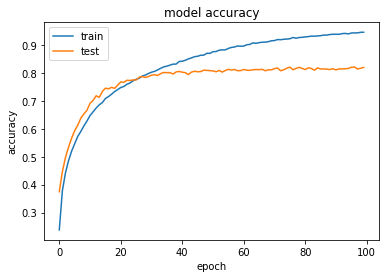

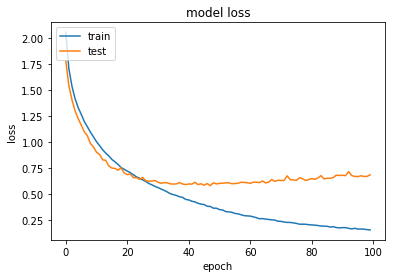

In [20]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[848,   8,  29,  11,  16,   1,   7,   9,  40,  31],
       [  9, 898,   1,   2,   5,   4,   5,   1,  15,  60],
       [ 57,   4, 661,  42,  92,  46,  51,  22,  15,  10],
       [ 18,   8,  42, 598,  65, 137,  68,  32,  15,  17],
       [ 13,   3,  34,  36, 824,  15,  27,  37,   7,   4],
       [ 11,   1,  30, 129,  38, 722,  15,  44,   6,   4],
       [  4,   5,  27,  32,  24,   5, 892,   3,   5,   3],
       [  8,   1,  25,  26,  35,  29,   3, 864,   1,   8],
       [ 45,  17,   2,   3,   4,   4,   4,   2, 901,  18],
       [ 15,  46,   1,   9,   3,   2,   4,   7,  19, 894]])

In [22]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.models import model_from_json

%matplotlib inline

# Scratch Model
weights_path = 'cifar10_weights_sgd100_4L.h5'
model_path = 'cifar10_architecture1_sgd100_4L.json'

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [23]:
import scipy

def preprocess_image(image_path, preprocess_input, resize_shape):
    img = load_img(image_path)
    img = img_to_array(img)
    img = scipy.misc.imresize(img, size=resize_shape)
    img = preprocess_input(img)
    return img

In [24]:
with open(model_path, 'r') as model_json:
    loaded_model = model_from_json(model_json.read())

loaded_model.load_weights(weights_path)
print("Scratch Model Loaded")

Scratch Model Loaded


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

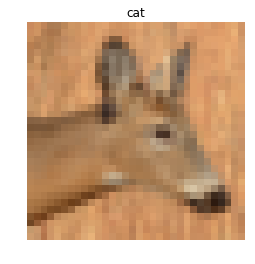

In [25]:
img = preprocess_image('images/deer.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'horse')

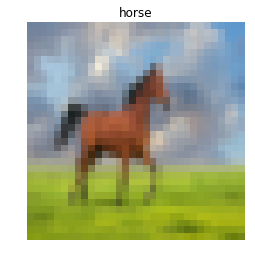

In [26]:
img = preprocess_image('images/horse.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

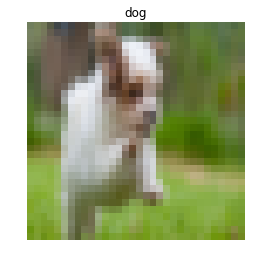

In [27]:
img = preprocess_image('images/dog.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'deer')

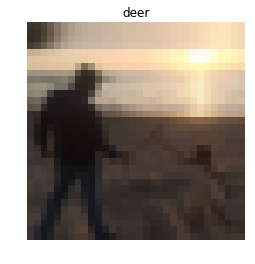

In [28]:
img = preprocess_image('images/dinesh.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

## References
https://github.com/JacobPolloreno/cifar10_keras<br>
Deep Learning with Keras by Antonio Gulli and Sujit Pal<br>
http://www.samyzaf.com/ML/cifar10/cifar10.html<br>
https://github.com/charlesgreen/keras_cifar10_cnn/blob/master/keras_cifar10_cnn/cifar10_cnn.py<br>
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/<br>
https://www.kernix.com/blog/a-toy-convolutional-neural-network-for-image-classification-with-keras_p14